In [15]:
from imp import reload
import groundfloor as gf
import pandas as pd
import numpy as np
import utils
pd.set_option('display.max_columns', 500)
reload(gf)
reload(utils)

<module 'utils' from '/home/shuang/project/gf/utils.py'>

In [16]:
funded = gf.GoundFloor('https://www.groundfloor.us/education/funded')
funded_df = funded.crawl()
funded_df.to_csv('groundfloor_funded_20170102.csv')

10 of 165 loan crawled
20 of 165 loan crawled
30 of 165 loan crawled
dates for https://www.groundfloor.us/investments/4107-belle-avenue-21215 unavailable
40 of 165 loan crawled
50 of 165 loan crawled
60 of 165 loan crawled
70 of 165 loan crawled
80 of 165 loan crawled
90 of 165 loan crawled
100 of 165 loan crawled
110 of 165 loan crawled
120 of 165 loan crawled
130 of 165 loan crawled
140 of 165 loan crawled
150 of 165 loan crawled
160 of 165 loan crawled
164 of 165 loan crawled, 1 failed


In [20]:
funded_df = pd.read_csv('groundfloor_funded_20170102.csv', index_col = 0)

In [21]:
funded_df.columns

Index(['address', 'amount', 'borrower', 'company', 'description', 'funded_on',
       'grade', 'investers', 'link', 'loan_to_value', 'matures_on',
       'parse_result', 'position', 'purpose', 'rate', 'repaid_on', 'start_on',
       'state', 'status', 'term', 'title', 'total_amount', 'zipcode'],
      dtype='object')

In [22]:
funded_df.status.value_counts()

Funded    86
Repaid    64
Late      14
Name: status, dtype: int64

In [28]:
funded_df[funded_df.status == 'Late'].borrower.value_counts()

Shannon Ferguson         4
Andy Luick               2
William Jones            2
Christian Chavez         1
Anthony Ii               1
Steven Hale              1
Ric Gaballa              1
Shirley A. Hicks         1
Mary Thomas Goodridge    1
Name: borrower, dtype: int64

In [31]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [32]:
transtab = {ord('A'):'1', ord('B'):'2', ord('C'):'3', ord('D'):'4', ord('E'):'5', ord('F'):'6', ord('G'):'7'}
funded_df['grade_int'] = funded_df['grade'].str.translate(transtab).astype(int)

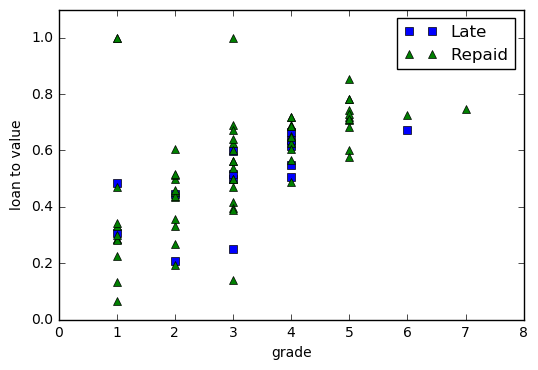

In [33]:
late_index = funded_df.status == 'Late'
repaid_index = funded_df.status == 'Repaid'
plt_late, = plt.plot(funded_df[late_index].grade_int, funded_df[late_index].loan_to_value, 'bs', label="Late")
plt_repaid, = plt.plot(funded_df[repaid_index].grade_int, funded_df[repaid_index].loan_to_value, 'g^', label="Repaid")
plt.legend(handles=[plt_late, plt_repaid], loc=1)
plt.axis([0, 8, 0, 1.1])
plt.ylabel('loan to value')
plt.xlabel('grade')
plt.show()
# conclusion: no obvious relationship between status and rate/loan_to_value

In [34]:
useful_index = funded_df.status != 'Funded'

In [36]:
funded_df[useful_index][['state', 'status']].groupby(['state', 'status']).size()

state  status
AL     Repaid     1
DC     Late       1
       Repaid     1
FL     Repaid     1
GA     Late       4
       Repaid    54
IL     Late       2
MD     Late       2
NC     Repaid     1
NH     Repaid     1
NJ     Late       5
OH     Repaid     2
TN     Repaid     1
TX     Repaid     1
VA     Repaid     1
dtype: int64